## Load Libraries

In [96]:
import numpy as np
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [97]:
df = pd.read_csv("Image_Dataset.csv")

## Display Image

In [98]:
def display(img):
    plt.imshow (img, interpolation = 'nearest')
    _ = plt.axis(False)
    print("Image Shape: ", img.shape)

## Shuffle Dataset

In [99]:
df = df.sample(frac=1).reset_index(drop=True)

## Seperate the target and independant variables

In [133]:
df_X = df.iloc[:, 0:-1]
df_Y = df.iloc[:, -1]

In [134]:
df_X.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 12278,Pixel 12279,Pixel 12280,Pixel 12281,Pixel 12282,Pixel 12283,Pixel 12284,Pixel 12285,Pixel 12286,Pixel 12287
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


## Bin Dataset

In [118]:
# Get Range Values
range_arr = np.linspace(0, 256, 5)
range_arr

array([  0.,  64., 128., 192., 256.])

In [119]:
def convert_val(x):
    if x >= 0 and x < 64:
        return 0
    elif x >= 64 and x < 128:
        return 1
    elif x >= 128 and x < 192:
        return 2
    else:
        return 3

In [128]:
new_df_X = df_X.applymap(convert_val)

In [131]:
new_df = new_df_X
new_df["Label"] = df_Y

In [216]:
new_df_X = new_df.iloc[:, 0:-1]

In [132]:
new_df.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 12279,Pixel 12280,Pixel 12281,Pixel 12282,Pixel 12283,Pixel 12284,Pixel 12285,Pixel 12286,Pixel 12287,Label
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,Pear
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,Banana
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,Strawberry
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,Apple
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,Mango


## Load Single Image

In [161]:
idx = 64
img = df.iloc[idx, 0:-1].values
img = img.reshape(64, 64, 3)
img = img.astype(np.int)

Image Shape:  (64, 64, 3)


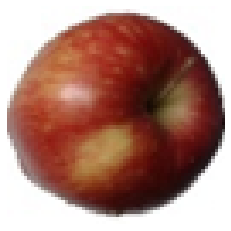

In [163]:
display(img)

## Color Histogram

In [174]:
idx = 64
img = df.iloc[idx, 0:-1].values
img = img.reshape(64, 64, 3)
img = img.astype(np.float32)

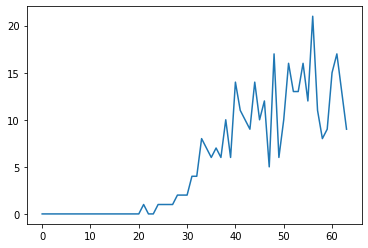

In [175]:
hist = cv2.calcHist([img], [0], None, [64], [0,64])
plt.plot(hist)

In [177]:
idx = 64
img = new_df.iloc[idx, 0:-1].values
img = img.reshape(64, 64, 3)
img = img.astype(np.float32)

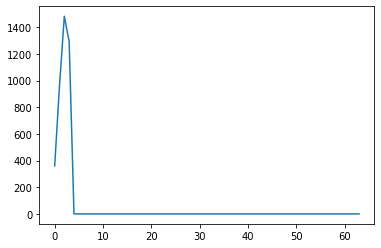

In [178]:
hist = cv2.calcHist([img], [0], None, [64], [0,64])
plt.plot(hist)

In [187]:
idx = 64
img = new_df.iloc[idx, 0:-1].values
img = img.reshape(64, 64, 3)
img = img.astype(np.int)

In [188]:
Z = img.reshape((-1, 3))

In [206]:
tmp_dict = {}
for i in range(4):
    for j in range(4):
        for k in range(4):
            tmp_dict[f'{i},{j},{k}'] = 0

In [209]:
for arr in Z:
    s = ",".join(arr.astype(str).tolist())
    if s in tmp_dict:
        tmp_dict[s]+=1
print(tmp_dict)

{'0,0,0': 720, '0,0,1': 0, '0,0,2': 0, '0,0,3': 0, '0,1,0': 0, '0,1,1': 0, '0,1,2': 0, '0,1,3': 0, '0,2,0': 0, '0,2,1': 0, '0,2,2': 0, '0,2,3': 0, '0,3,0': 0, '0,3,1': 0, '0,3,2': 0, '0,3,3': 0, '1,0,0': 1694, '1,0,1': 0, '1,0,2': 0, '1,0,3': 0, '1,1,0': 110, '1,1,1': 116, '1,1,2': 0, '1,1,3': 0, '1,2,0': 0, '1,2,1': 0, '1,2,2': 0, '1,2,3': 0, '1,3,0': 0, '1,3,1': 0, '1,3,2': 0, '1,3,3': 0, '2,0,0': 982, '2,0,1': 0, '2,0,2': 0, '2,0,3': 0, '2,1,0': 846, '2,1,1': 784, '2,1,2': 0, '2,1,3': 0, '2,2,0': 0, '2,2,1': 222, '2,2,2': 132, '2,2,3': 0, '2,3,0': 0, '2,3,1': 0, '2,3,2': 0, '2,3,3': 0, '3,0,0': 0, '3,0,1': 0, '3,0,2': 0, '3,0,3': 0, '3,1,0': 2, '3,1,1': 84, '3,1,2': 0, '3,1,3': 0, '3,2,0': 0, '3,2,1': 92, '3,2,2': 104, '3,2,3': 0, '3,3,0': 0, '3,3,1': 0, '3,3,2': 4, '3,3,3': 2300}


In [222]:
test = pd.DataFrame()
test = test.append(tmp_dict, ignore_index = True)
test.head()

TypeError: append() got an unexpected keyword argument 'inplace'

## Create New Dataset

In [223]:
final_dataset = pd.DataFrame()
for idx in range(len(new_df_X)):
    img = new_df_X.iloc[idx].values
    img = img.reshape(64, 64, 3)
    img = img.astype(np.int)
    Z = img.reshape((-1, 3))
    tmp_dict = {}
    for i in range(4):
        for j in range(4):
            for k in range(4):
                tmp_dict[f'{i},{j},{k}'] = 0
    for arr in Z:
        s = ",".join(arr.astype(str).tolist())
        if s in tmp_dict:
            tmp_dict[s]+=1
    final_dataset = final_dataset.append(tmp_dict, ignore_index = True)

In [225]:
column_arr = []
for i in range(4):
        for j in range(4):
            for k in range(4):
                column_arr.append(f'{i},{j},{k}')

In [227]:
final_dataset.rename(columns={j:f"Color Combo {i + 1}" for i, j in enumerate(column_arr)}, inplace = True)

In [230]:
final_dataset["Label"] = df_Y

In [232]:
final_dataset.head(20)

,Color Combo 1,Color Combo 2,Color Combo 3,Color Combo 4,Color Combo 5,Color Combo 6,Color Combo 7,Color Combo 8,Color Combo 9,Color Combo 10,...,Color Combo 56,Color Combo 57,Color Combo 58,Color Combo 59,Color Combo 60,Color Combo 61,Color Combo 62,Color Combo 63,Color Combo 64,Label
0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,95.0,12.0,0.0,0.0,9.0,69.0,1708.0,Pear
1,62.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,2887.0,Banana
2,281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,12.0,2.0,0.0,0.0,6.0,1696.0,Strawberry
3,292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,52.0,65.0,0.0,0.0,0.0,5.0,1029.0,Apple
4,542.0,6.0,0.0,0.0,299.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1438.0,Mango
5,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,278.0,6.0,0.0,0.0,6.0,84.0,1560.0,Pear
6,713.0,7.0,0.0,0.0,315.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1457.0,Mango
7,188.0,2.0,0.0,0.0,75.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.0,1073.0,Limes
8,141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.0,63.0,0.0,0.0,0.0,2.0,1040.0,Apple
9,470.0,12.0,0.0,0.0,115.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1265.0,Mango


### Output CSV

In [234]:
final_dataset.to_csv("Image_Dataset_color_features.csv", index=False)

In [86]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center = cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [87]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

## Color Histogram

Image Shape:  (64, 64, 3)


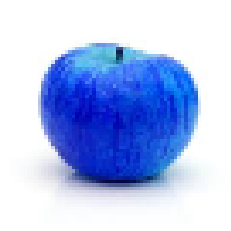

In [89]:
display(img)

In [90]:
hist = cv2.calcHist([img], [0], None, [256], [0,256])

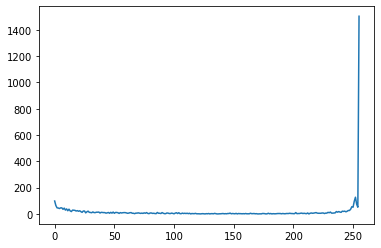

In [91]:
plt.plot(hist)

Image Shape:  (64, 64, 3)


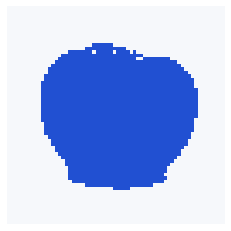

In [92]:
display(res2)

In [93]:
hist = cv2.calcHist([res2], [0], None, [256], [0,256])

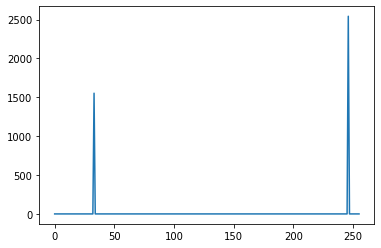

In [94]:
plt.plot(hist)